In [34]:
import torch
from model import RNN2
from data import CustomDataset
from torch.utils.data import DataLoader
from collections import defaultdict
import seaborn as sns
import numpy as np
import functools as func

# Bakery 3

In [6]:
model = RNN2(2, 10, 2)
NUMBER = 3
group = 'Bakery'
checkpoint = torch.load(f'models/{NUMBER}/model-{group}.pth')
model.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

<AxesSubplot:>

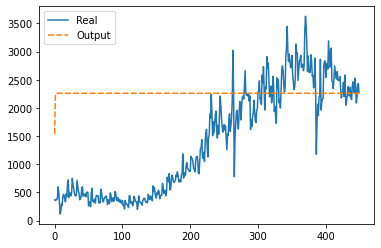

In [46]:
dataset = CustomDataset('clean.pickle', group, 7, 1, True)
train_loader = DataLoader(dataset, batch_size=1, shuffle=False)
res = defaultdict(list)
hidden = None
for x, y in train_loader:
    pred, hidden = model(x, hidden)
    hidden = hidden.data
    res['Real'].append(y.detach().numpy())
    res['Output'].append(pred.detach().numpy())
flatten = lambda y : list(map(lambda x: x[0], func.reduce(lambda x, y: list(x) + list(y), y)))
res = {
    'Real':flatten(res['Real']),
    'Output': flatten(res['Output']),
    }
sns.lineplot(data=res)